In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_json('News_Category_Dataset.json', lines=True)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [8]:
data['headline_processed'] = data.headline.str.replace('[{}]'.format(string.punctuation), '').str.lower()
data['short_description_processed'] = data.short_description.str.replace('[{}]'.format(string.punctuation), '').str.lower()

In [9]:
data.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [10]:
def category_cleaner(x):
    
    if x == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif x == 'PARENTING':
        return 'PARENTS'
    elif x == 'ARTS' or x == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif x == 'STYLE':
        return 'STYLE & BEAUTY'
    elif x == 'COLLEGE':
        return 'EDUCATION'
    elif x == 'TASTE':
        return 'FOOD & DRINK'
    else:
        return x
    
data['category'] = data.category.apply(category_cleaner)


le = LabelEncoder()
data_labels = le.fit_transform(data.category)
list(le.classes_)

['ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COMEDY',
 'CRIME',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'GREEN',
 'HEALTHY LIVING',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTS',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE & BEAUTY',
 'TECH',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST']

In [11]:
data.authors.unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [12]:
data['authors'] = data.authors.apply(lambda x: x.split(',')[0])
data['authors'] = data.authors.str.replace(' ', '', regex=False)
data.authors.unique()

array(['MelissaJeltsen', 'AndyMcDonald', 'RonDicker', ..., 'SarahCosta',
       'MateoGutierrez', 'JohnGiacobbi'], dtype=object)

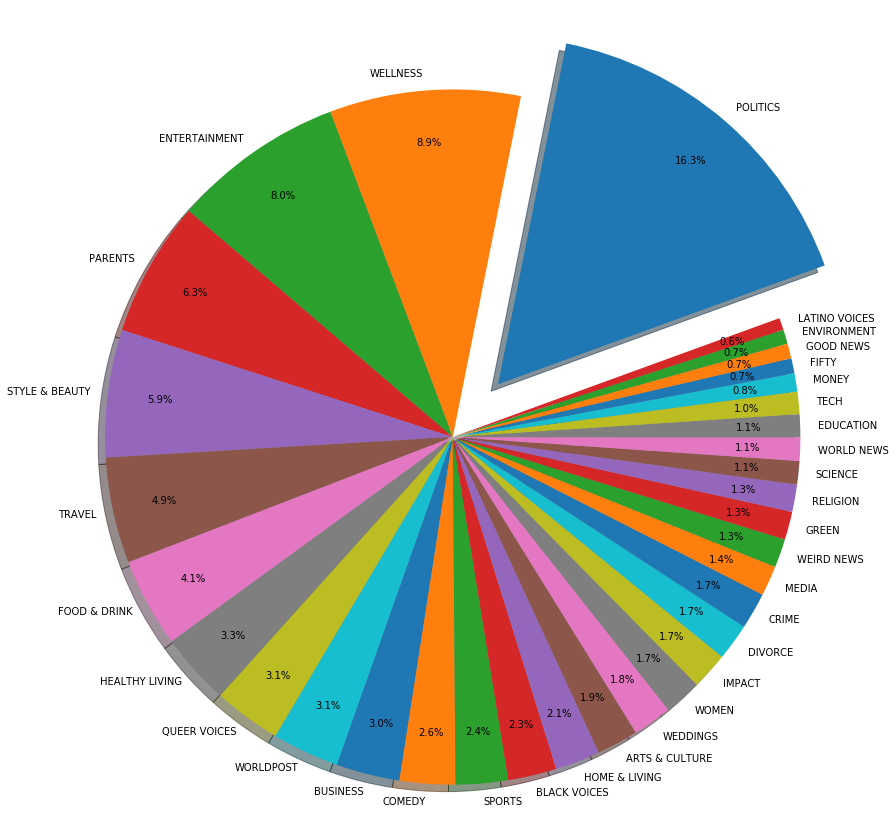

In [13]:
plt.figure(figsize=(15,15))
sizes = data.category.value_counts().values
labels = data.category.value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20, 
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, data_labels, 
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=555)

In [15]:
counter = CountVectorizer(stop_words='english')

train_headline_counts = counter.fit_transform(x_train.headline_processed)
test_headline_counts = counter.transform(x_test.headline_processed)

train_short_description_counts = counter.fit_transform(x_train.short_description_processed)
test_short_description_counts = counter.transform(x_test.short_description_processed)

In [16]:
classifier = ComplementNB()

classifier.fit(train_headline_counts, y_train)
headline_soft_predictions = classifier.predict_proba(test_headline_counts)
headline_predictions = classifier.predict(test_headline_counts)

classifier.fit(train_short_description_counts, y_train)
short_description_soft_predictions = classifier.predict_proba(test_short_description_counts)
short_description_predictions = classifier.predict(test_short_description_counts)

In [17]:
soft_predictions = (headline_soft_predictions + short_description_soft_predictions) / 2
predictions = np.argmax(soft_predictions, axis = 1)
print('Accuracy without tokenization: {}'.format(accuracy_score(predictions, y_test)))

Accuracy without tokenization: 0.6228622638221603


In [18]:
train_counts = counter.fit_transform(x_train.headline_processed.str.cat(x_train.short_description_processed))
test_counts = counter.transform(x_test.headline_processed.str.cat(x_test.short_description_processed))
classifier.fit(train_counts, y_train)
predictions_combined =  classifier.predict(test_counts)
text_combined_soft_predictions = classifier.predict_proba(test_counts)
print('Accuracy with combined text and without tokenization: {}'.format(accuracy_score(predictions, y_test)))

Accuracy with combined text and without tokenization: 0.6228622638221603


In [19]:
train_authors_counts = counter.fit_transform(x_train.authors)
test_authors_counts = counter.transform(x_test.authors)

classifier.fit(train_authors_counts, y_train)
authors_prediction = classifier.predict(test_authors_counts)
authors_soft_prediction = classifier.predict_proba(test_authors_counts)
accuracy_score(authors_prediction, y_test)

0.5428791914565234

In [20]:
final_prediction = np.argmax((text_combined_soft_predictions + authors_soft_prediction) / 2, axis=1)
accuracy_score(final_prediction, y_test)

0.7076249035373777